<a href="https://colab.research.google.com/github/SudharsanSrinivasan14/POC/blob/main/POC_MLR%2CKnn%2CSvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier

# **Data On Boarding**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Real estate.csv to Real estate.csv


In [ ]:
df = read_csv('Real estate.csv')

In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
dt=df.copy()

# **EDA**

In [ ]:
df.shape

(414, 8)

In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.isnull()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

# **Drop Entire Columns ('No', 'X1 transaction date')**

In [ ]:
dt1 = dt.drop(['No', 'X1 transaction date'],axis=1)
dt1

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


# **X,Y ILOC**

In [ ]:
x=dt1.iloc[:,0:5]
x

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [ ]:
y=dt1.iloc[:,5]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

# **train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state=0)

In [ ]:
y_test

356    45.3
170    14.4
224    46.0
331    15.6
306    50.2
       ... 
353    31.3
81     36.8
107    26.6
362    40.0
410    50.0
Name: Y house price of unit area, Length: 125, dtype: float64

# **MLR**

In [ ]:
# train the Simple Linear Regression
from sklearn.linear_model import LinearRegression
std_reg = LinearRegression()
std_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# predict the results
y_predict = std_reg.predict(x_test)
y_predict

array([42.28528437, 12.27992219, 41.14521971, 12.07654413, 41.19877458,
       39.96261381, 39.80967128, 34.37998382, 48.40268454, 44.96247404,
       45.49657411, 41.04699349, 41.64610787, 40.15316844, 49.23582966,
       36.14243609, 39.89878977, 43.47736565, 42.24516261, 43.47299177,
       52.44723106, 31.28121519, 41.33148963, 46.35673308, 47.99167265,
       44.74906892, 45.11535679, 28.8175559 , 48.27317433, 23.75458901,
       43.24417167, 33.56574092, 45.05394188, 36.52732377, 45.2556407 ,
       31.22510163, 47.48470692, 39.56324227, 54.19337574,  9.86489322,
       51.53883165, 34.4439916 , 36.28430241, 47.79658873, 14.78355865,
       42.93477208, 44.54719894, 15.36928391, 33.17697396, 46.84483188,
       52.2227768 , 41.21946366, 49.13044709, 24.84098435, 31.30927198,
       35.87220821, 49.10506298, 40.71252772, 45.60880124, 33.67796805,
       42.10260482, 42.09666659, 40.4613223 , 48.57102523, 39.08596413,
       30.25271463, 12.34446524, 33.0122525 , 49.30146045, 39.96

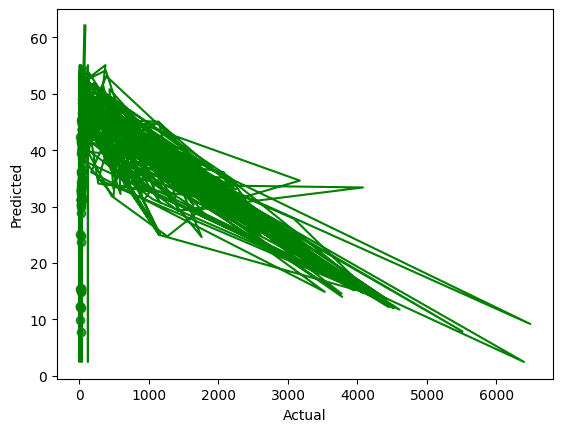

In [ ]:
# Plotting
sns.regplot(x=y_test,y=y_predict,ci=None,color="green")
plt.plot(x_train,std_reg.predict(x_train),color="green")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()

In [ ]:
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
#Predicting the test set result
y2_pred= knn_model.predict(x_test)

In [ ]:
y2_pred

array([49.86, 18.2 , 40.28, 18.2 , 36.36, 37.32, 40.66, 33.4 , 45.08,
       40.74, 59.72, 43.06, 47.36, 44.6 , 63.56, 35.56, 37.62, 48.48,
       39.76, 42.36, 56.92, 40.18, 30.42, 49.54, 42.96, 44.34, 40.5 ,
       26.56, 51.5 , 30.64, 49.98, 37.28, 48.08, 37.74, 40.5 , 40.18,
       53.42, 28.7 , 53.6 , 15.26, 45.76, 45.62, 26.34, 52.18, 16.58,
       53.2 , 37.76, 16.66, 26.72, 53.82, 59.38, 37.54, 51.66, 24.76,
       40.18, 46.62, 52.1 , 37.22, 59.72, 37.28, 35.56, 53.42, 48.8 ,
       45.08, 40.9 , 26.38, 18.2 , 24.32, 52.1 , 37.32, 30.42, 51.5 ,
       40.9 , 24.52, 39.94, 28.42, 26.98, 18.2 , 48.96, 32.18, 51.64,
       40.18, 36.22, 25.58, 25.58, 39.94, 41.6 , 25.1 , 51.5 , 47.76,
       48.48, 41.56, 40.18, 30.42, 17.1 , 40.9 , 28.18, 40.74, 16.66,
       41.6 , 48.48, 39.76, 42.5 , 32.18, 47.36, 40.18, 42.5 , 15.26,
       42.84, 18.28, 41.32, 37.54, 26.84, 37.28, 49.5 , 26.76, 43.28,
       44.6 , 39.16, 26.38, 28.42, 40.14, 40.18, 32.18, 56.92])

# **SVM**

In [ ]:
# Import and build Support Vector Regression
from sklearn.svm import SVR
SVR_model = SVR(kernel='rbf')
SVR_model.fit(x_train, y_train)

SVR()

In [ ]:
# Predict the outcome using Test data
y3_predict = SVR_model.predict(x_test)

In [ ]:
y3_predict

array([45.03392538, 21.46335901, 43.89265888, 21.45829544, 45.38870227,
       41.97796827, 45.360789  , 42.99397334, 44.39078163, 43.18298491,
       44.66804441, 43.79536664, 45.24236713, 45.47065216, 44.58836601,
       40.3075171 , 41.92149547, 45.27037377, 41.95933549, 45.19831318,
       46.0036433 , 30.51923984, 34.77603356, 44.28296064, 42.47723739,
       43.26884663, 42.45802873, 27.32105006, 43.19381223, 24.04273473,
       44.05021913, 37.23519439, 44.45031728, 40.80717005, 42.45852022,
       30.51909707, 45.75149327, 28.62108153, 43.31898592, 26.38997407,
       43.77566205, 41.15806546, 29.15603084, 45.83952703, 21.65477878,
       43.35735315, 41.46375178, 21.67797095, 26.30361277, 46.23011177,
       46.00300021, 40.21354508, 44.10235642, 31.57214981, 30.51931122,
       40.96982226, 43.27205363, 42.06469905, 44.66841274, 37.23556269,
       40.30638463, 45.72811213, 42.616383  , 44.39131763, 45.22619945,
       25.47841171, 21.45300617, 29.70326756, 43.27264072, 41.97